Data used: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/discussion

Importing libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import collections
import pylab
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df_focus = pd.read_csv('path/to/file/unclean focus.csv')

Get shape of our dataset before cleaning.

In [3]:
df_focus.shape

(5604, 11)

In [4]:
df_focus.head(100)

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236
1,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927
2,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363
3,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868
4,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057
...,...,...,...,...,...,...,...,...,...,...,...
95,Focus,2019.0,"£21,570",Automatic,NaN,Diesel,2,"8,566",NaN,NaN,/ad/25444759
96,Focus,2019.0,"£21,680",Automatic,NaN,Diesel,2,"7,846",NaN,NaN,/ad/25444760
97,Focus,2019.0,"£20,480",Manual,NaN,Petrol,1.5,"4,711",NaN,NaN,/ad/25444762
98,Focus,2019.0,"£17,500",Automatic,NaN,Petrol,1,"12,877",NaN,NaN,/ad/25444765


There are two columns with engine, if column 'engine size2' if empty there is a value in column
'engine size'. Column 'engine size' has wrong values with symbol of pound.

In [5]:
engine_size = df_focus['engine size2'].fillna(df_focus['engine size'])
df_focus['ES'] =engine_size



We can see that in data are values that are not converted to liters or have letters.
Now we will convert that data into desired form.

In [6]:
df_focus['ES'].unique()

array(['0.999', '1.498', '1.56', '999', '1000', '2300', '1498', '1.5',
       '1.499', '1.596', '1.997', '2', '1', '1500', '1.6', '2.3', '1.8',
       '1600', '1999', '1596', '1798', nan, '1560', '998', '1997', '1499',
       '1560 cc', '2000', '1988', '2521', '2261', '0', '0.998', '1496',
       '1753', '1989', '2.5', '1596 cc', '2.29', 'Unknown', '2.521',
       '1388', '1.0T', ' 2,00 cc'], dtype=object)

In [7]:
df_focus['ES'] = df_focus['ES'].str.strip(string.ascii_letters)  # stripping from ascii letters.
df_focus['ES'] = df_focus['ES'].str.strip(' ')
df_focus['ES'] = df_focus['ES'].str.replace(',','.')
df_focus['ES'] = pd.to_numeric(df_focus['ES'])  # convert string to numeric.
df_focus['ES'] = df_focus['ES'].apply(lambda x: x / 1000 if x > 900 else x)
df_focus['ES'] = df_focus['ES'].apply(lambda x: x if x > 0 else np.nan)
#df_focus['ES'] = df_focus['ES'][df_focus['ES'].notnull()]  # dropping if value is NaN. other way when only one column is array
df_focus['ES'] = np.round(df_focus['ES'], 1)
#df_focus['ES'].dropna(axis=0, inplace=True) # dropping if value is NaN.



Finally we get data in form that we wanted. Only NaN value we should delete, which will be done in future.

In [8]:
df_focus['ES'].unique()

array([1. , 1.5, 1.6, 2.3, 2. , 1.8, nan, 2.5, 1.4])

There are two columns with mileage. Column 'mileage' is correct so we will fill here nan values 
from column 'mileage2'. Next we will convert it into float.

In [9]:
mileage = df_focus['mileage'].fillna(df_focus['mileage2'])
df_focus['MIL'] = mileage
df_focus['MIL'] = df_focus['MIL'].str.replace(',','')
df_focus['MIL'] = pd.to_numeric(df_focus['MIL'],errors='coerce')  # convert to string, drop row if error.


In [10]:
df_focus['MIL'].head()


0    38852.0
1    11952.0
2    22142.0
3    14549.0
4     7010.0
Name: MIL, dtype: float64

There are two columns with fuel type so now we will fill nan values in column 'fuel type' with 
values from column 'fuel type2'.

In [11]:
fuel_type = df_focus['fuel type2'].fillna(df_focus['fuel type'])
df_focus['FT'] = fuel_type



We have value 'other', need to know how many others is in columns, if small amount will be dropped.

In [12]:
df_focus['FT'].unique()

array(['Petrol', 'Diesel', nan, 'Other'], dtype=object)

In [13]:
collections.Counter(df_focus['FT'])  # because of error with np.unique() method use collections.Counter


Counter({'Petrol': 3606, 'Diesel': 1941, nan: 56, 'Other': 1})

In [14]:
df_focus = df_focus[df_focus['FT']!='Other']  # handling with 'Other' value.

So now we have data like we want, only NaN value we should delete. In next step we will drop all NaN values from all DF.

In [15]:
df_focus['FT'].unique()


array(['Petrol', 'Diesel', nan], dtype=object)

In [16]:
df_focus.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference,ES,MIL,FT
0,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236,1.0,38852.0,Petrol
1,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927,1.0,11952.0,Petrol
2,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363,1.5,22142.0,Petrol
3,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868,1.6,14549.0,Diesel
4,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057,1.6,7010.0,Diesel


Changing price to numeric value.

In [17]:
df_focus['price'] = df_focus['price'].str.replace('£','') 
df_focus['price'] = df_focus['price'].str.replace(',','') 
df_focus['price'] = pd.to_numeric(df_focus['price'])

Dropping unnecesary columns, formating columns labels, reindexing columns and also NaN values.

In [18]:
df_focus.reset_index(inplace=True)
df_focus.drop(labels=[
    'mileage', 'fuel type', 'engine size', 'mileage2', 'engine size2', 'reference', 'fuel type2', 'index'], 
              axis=1, inplace=True
             )
df_focus.rename(mapper={
    'ES': 'engine size',
    'MIL': 'mileage',
    'FT': 'fuel type',
    'price': 'pricePD',
    },
                axis= 1,inplace=True
               )
df_focus.reindex(labels=[
    'model', 'year', 'price', 'mileage', 'engine size', 'fuel type', 'transmission'], 
                 axis=1
                 )
df_focus.dropna(inplace=True)

Get shape of our dataset after cleaning.

In [19]:
df_focus.shape

(5442, 7)

Removing decimal points from values in column 'year' and 'MIL'.

In [20]:
df_focus['year'] = df_focus['year'].astype(int)
df_focus['mileage'] = df_focus['mileage'].astype(int)

In [21]:
df_focus.head()

,model,year,pricePD,transmission,engine size,mileage,fuel type
0,Focus,2016,8000.0,Manual,1.0,38852,Petrol
1,Focus,2019,13400.0,Manual,1.0,11952,Petrol
2,Focus,2019,14600.0,Manual,1.5,22142,Petrol
3,Focus,2016,9450.0,Manual,1.6,14549,Diesel
4,Focus,2015,9999.0,Manual,1.6,7010,Diesel


In [22]:
### zrobic wykresy zaleznosci, heat map, boxplot, zaleznosci cen od tego czy disel czy benzyna, w zaleznosci od roku?
### przedzialu lat?? ilosc ogloszen z manualna i automatyczna, sredni przebieg auta oraz wiek, podzial na silniki
### potem zrobic regresje liniowa, oraz multi regresje liniowa

Now we will create boxplot to visualise spread of variable price in pounds.

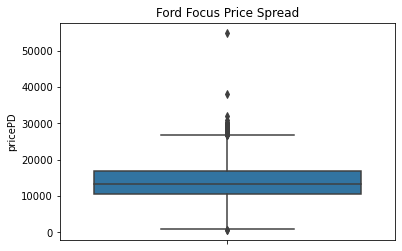

count     5442.000000
mean     13582.471334
std       4739.585635
min        495.000000
25%      10490.000000
50%      13300.000000
75%      16989.750000
max      54995.000000
Name: pricePD, dtype: float64

In [23]:
plt.title('Ford Focus Price Spread')
sns.boxplot(y=df_focus.pricePD)
plt.show()
df_focus.pricePD.describe()

When we look at the box-plot we can see, that average price of Ford Focus is around 13,5K Pounds, exactly the same 
is about the median. The cheapest Ford Focus we can found on auctions at price 495 Pounds and the most expensive around 55K.

Now we will create a histogram to see distribution of the value Price in Pounds.

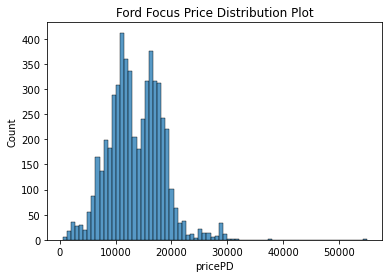

In [24]:
plt.title('Ford Focus Price Distribution Plot')
sns.histplot(df_focus.pricePD)
plt.show()

Now we will create boxplot to visualise spread of variable mileage and a histogram to see distribution of the value mileage.

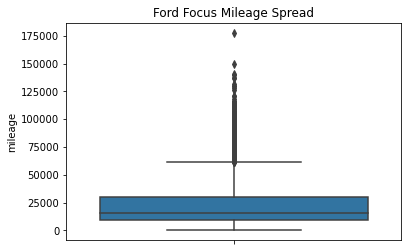

count      5442.000000
mean      22881.219588
std       20612.589290
min           1.000000
25%        9137.000000
50%       15932.500000
75%       30063.750000
max      177644.000000
Name: mileage, dtype: float64

In [25]:
plt.title('Ford Focus Mileage Spread')
sns.boxplot(y=df_focus.mileage)
plt.show()
df_focus.mileage.describe()

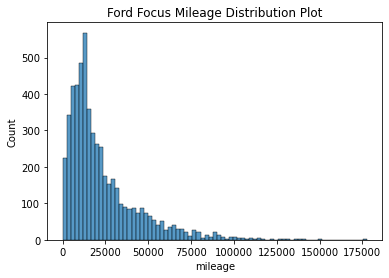

In [26]:
plt.title('Ford Focus Mileage Distribution Plot')
sns.histplot(df_focus.mileage)
plt.show()

Checking the multicollinearity.

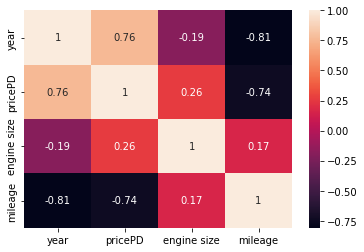

In [27]:
sns.heatmap(df_focus.corr(),annot=True)
plt.show()

There is high positive correlation between:
- year and price in pounds: 0,76; 

Also we can se there is high negative corelation between: 
- year and mileage: -0,81;
- price in pounds ang mileage: - 0,74;

Plots with corelations that we observe:

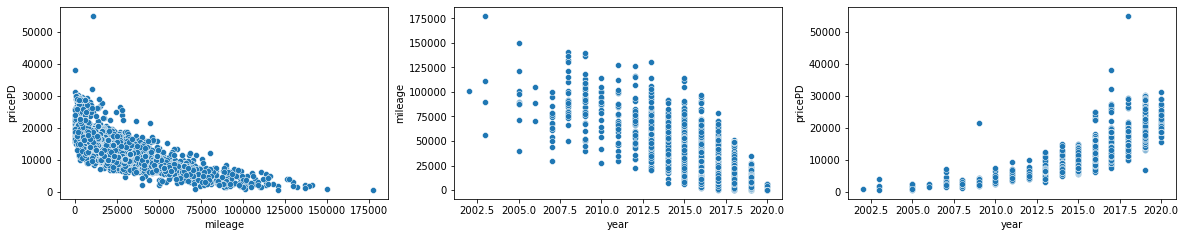

In [28]:
plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.scatterplot(data=df_focus, x="mileage", y="pricePD")

plt.subplot(3,3,2)
sns.scatterplot(data=df_focus, x="year", y="mileage")

plt.subplot(3,3,3)
sns.scatterplot(data=df_focus, x="year", y="pricePD")

plt.show()

Price vs Fuel type and additionaly histogram with numbers of oferts depending on fuel type:

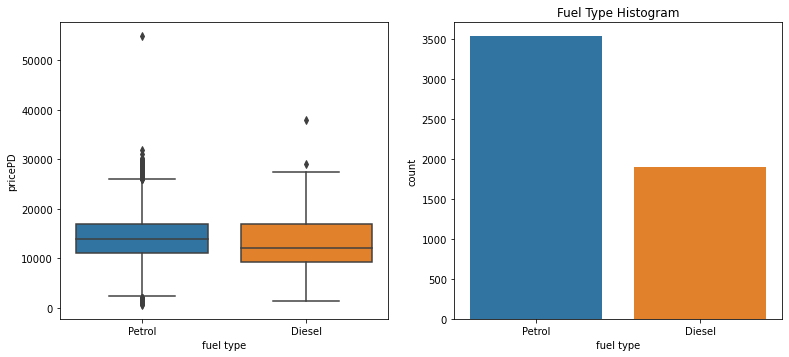

In [29]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fuel type', y= 'pricePD', data=df_focus)

plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = df_focus['fuel type'].value_counts(ascending=False).index
sns.countplot(x='fuel type', data=df_focus, order=order)

plt.show()

In [30]:
petrol = df_focus[df_focus['fuel type']== 'Petrol']['pricePD'].describe()
diesel = df_focus[df_focus['fuel type']== 'Diesel']['pricePD'].describe()
describe_petrol = pd.DataFrame({'Petrol': petrol, 'Diesel': diesel})
describe_petrol =np.round(describe_petrol, 2)
describe_petrol

,Petrol,Diesel
count,3536.00,1906.00
mean,13919.09,12957.98
std,4680.10,4786.93
min,495.00,1290.00
25%,10997.75,9312.50
50%,13990.00,11998.00
75%,16990.00,16932.75
max,54995.00,38015.00


Price vs transmission system and additionaly histogram with numbers of oferts depending 
on transmission system:

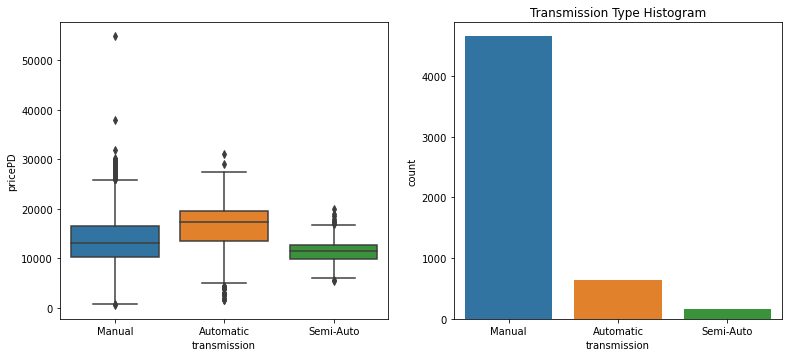

In [31]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'transmission', y= 'pricePD', data=df_focus)

plt.subplot(2,3,2)
plt.title('Transmission Type Histogram')
order = df_focus['transmission'].value_counts(ascending=False).index
sns.countplot(x='transmission', data=df_focus, order=order)

plt.show()

In [32]:
manual = df_focus[df_focus['transmission']== 'Manual']['pricePD'].describe()
automatic = df_focus[df_focus['transmission']== 'Automatic']['pricePD'].describe()
semi_auto = df_focus[df_focus['transmission']== 'Semi-Auto']['pricePD'].describe()
describe_transmission = pd.DataFrame({
    'Manual': manual, 
    'Automatic': automatic,
    'Semi-Auto': semi_auto
})
describe_transmission =np.round(describe_transmission, 2)
describe_transmission

,Manual,Automatic,Semi-Auto
count,4652.00,635.00,155.00
mean,13276.47,16349.27,11431.59
std,4686.96,4540.92,2505.72
min,495.00,1475.00,5490.00
25%,10200.00,13496.50,9935.00
50%,12998.00,17320.00,11550.00
75%,16498.00,19485.00,12655.00
max,54995.00,30999.00,19979.00


Price vs engine size and additionaly histogram with numbers of oferts depending on 
engine size:

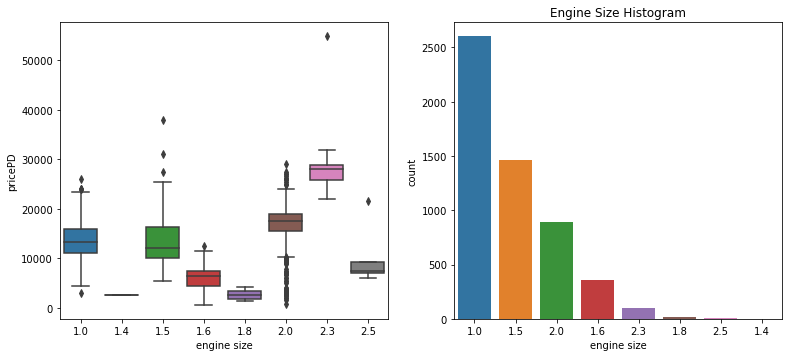

In [33]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'engine size', y= 'pricePD', data=df_focus)

plt.subplot(2,3,2)
plt.title('Engine Size Histogram')
order = df_focus['engine size'].value_counts(ascending=False).index
sns.countplot(x='engine size', data=df_focus, order=order)

plt.show()

In [34]:
engines = df_focus['engine size'].unique()
describe_engine = pd.DataFrame({
    esize: df_focus[df_focus['engine size']== esize]['pricePD'].describe() for esize in engines
    },)
describe_engine = describe_engine.reindex(labels=sorted(list(engines)),axis=1)
describe_engine =np.round(describe_engine, 2)
describe_engine


,1.0,1.4,1.5,1.6,1.8,2.0,2.3,2.5
count,2601.00,1.0,1466.00,361.00,16.00,889.00,103.00,5.00
mean,13317.07,2495.0,13047.49,6038.02,2602.00,16913.71,27564.81,10235.80
std,3352.59,NaN,4034.34,2273.52,948.77,3780.73,3379.30,6402.81
min,3000.00,2495.0,5492.00,495.00,1290.00,675.00,22000.00,5995.00
25%,10995.00,2495.0,9998.25,4500.00,1771.00,15500.00,25747.50,6995.00
50%,13291.00,2495.0,11995.00,6395.00,2645.00,17503.00,27995.00,7490.00
75%,16000.00,2495.0,16245.00,7499.00,3346.00,18998.00,28805.00,9199.00
max,25998.00,2495.0,38015.00,12495.00,4195.00,29000.00,54995.00,21500.00


Price vs year of production size and additionaly histogram with numbers of oferts 
depending on year of production:

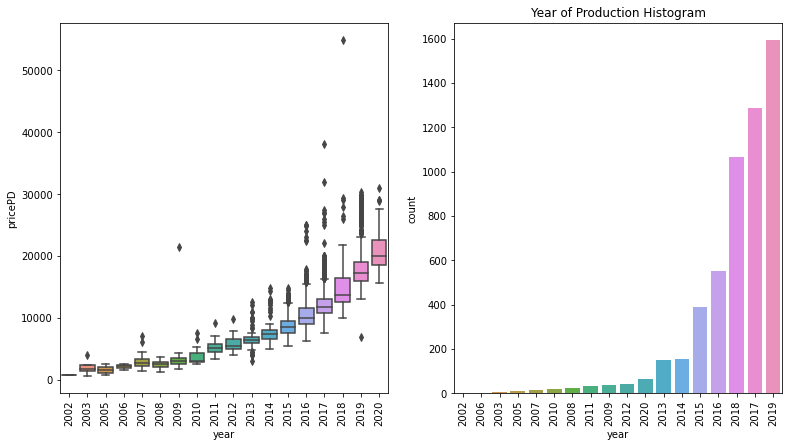

In [35]:
plt.figure(figsize=(20, 15))

plt.subplot(2,3,1)
sns.boxplot(x = 'year', y= 'pricePD', data=df_focus)
plt.xticks(rotation=90)

plt.subplot(2,3,2)
plt.title('Year of Production Histogram')
order = df_focus['year'].value_counts(ascending=True).index
sns.countplot(x='year', data=df_focus, order=order)
plt.xticks(rotation=90)

plt.show()

In [36]:
years = df_focus['year'].unique()
describe_years = pd.DataFrame({
    f'{y}': df_focus[df_focus['year']== y]['pricePD'].describe() for y in years
    },)
describe_years = describe_years.reindex(columns=sorted(str(y) for y in years))
describe_years =np.round(describe_years, 2)
describe_years


,2002,2003,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,1.0,4.00,10.00,3.00,15.00,25.00,36.00,19.00,32.00,42.00,150.00,156.00,390.00,552.00,1285.00,1064.00,1592.00,66.00
mean,795.0,1941.00,1558.90,2061.67,3129.27,2461.44,3517.36,3730.84,5192.38,5775.76,6470.84,7590.14,8829.91,10909.49,12590.47,14611.87,17859.09,21104.55
std,NaN,1474.31,620.90,513.16,1559.67,692.84,3157.52,1417.95,1222.78,1151.14,1333.55,1739.35,1802.94,2872.69,2933.00,3066.88,3035.26,3206.29
min,795.0,495.00,675.00,1495.00,1450.00,1290.00,1695.00,2495.00,3295.00,3899.00,2995.00,4990.00,5492.00,6299.00,7495.00,9950.00,6900.00,15600.00
25%,795.0,1305.00,1074.75,1845.00,2145.00,1995.00,2495.00,2762.00,4420.00,5000.00,5899.75,6618.75,7600.00,9000.00,10789.00,12499.00,15995.00,18502.75
50%,795.0,1635.00,1525.00,2195.00,2695.00,2499.00,2995.00,3000.00,5147.00,5499.00,6438.50,7296.50,8463.50,10000.00,11698.00,13700.00,17150.00,20000.00
75%,795.0,2271.00,1967.50,2345.00,3245.00,2900.00,3487.50,4242.50,5793.75,6493.75,6796.75,7997.50,9498.00,11605.50,13000.00,16495.00,18978.75,22497.50
max,795.0,3999.00,2495.00,2495.00,6995.00,3695.00,21500.00,7490.00,9199.00,9799.00,12495.00,14800.00,14740.00,25000.00,38015.00,54995.00,30359.00,30999.00


Now we will be using plynominal regression imported from sklearn.

Firstly we will take correlation between price and year.

In [37]:
x = df_focus['year'].values.reshape((-1,1))
y = df_focus['pricePD'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 100,)

poly_reg = PolynomialFeatures(degree = 3)
x_train = poly_reg.fit_transform(x_train)
x_test = poly_reg.fit_transform(x_test)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)
print('Score of training is: '+ str((poly_reg_model.score(x_train,y_train)*100).round(2))+'%')
print('Score of testing is: '+ str((poly_reg_model.score(x_test,y_test)*100).round(2))+'%')



Score of training is: 66.69%
Score of testing is: 58.39%


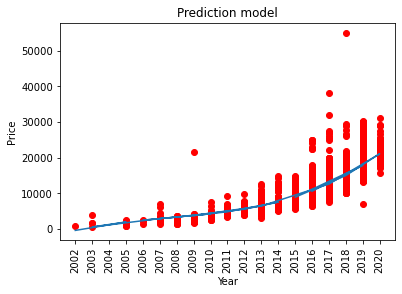

In [38]:
uniq_x = df_focus['year'].unique().reshape((-1,1))
plt.scatter(df_focus['year'],df_focus['pricePD'],color='red', label='collected values')
plt.plot(uniq_x, poly_reg_model.predict(poly_reg.fit_transform(uniq_x)), label= 'Polynominal regression')
plt.title('Prediction model')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90, ticks=range(2002,2021))
plt.show()

Year and mileage polynominal prediction.

In [39]:
x = df_focus['year'].values.reshape((-1,1))
y = df_focus['mileage'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 100,)

poly_reg = PolynomialFeatures(degree = 2)
x_train = poly_reg.fit_transform(x_train)
x_test = poly_reg.fit_transform(x_test)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)
print('Score of training is: '+ str((poly_reg_model.score(x_train,y_train)*100).round(2))+'%')
print('Score of testing is: '+ str((poly_reg_model.score(x_test,y_test)*100).round(2))+'%')


Score of training is: 67.02%
Score of testing is: 63.47%


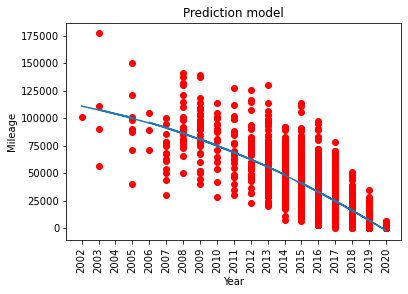

In [40]:
uniq_x = df_focus['year'].unique().reshape((-1,1))
plt.scatter(x,y,color='red', label='collected values')
plt.plot(uniq_x, poly_reg_model.predict(poly_reg.fit_transform(uniq_x)), label= 'Polynominal regression')
plt.title('Prediction model')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.xticks(rotation=90, ticks=range(2002,2021))
plt.show()

Price and mileage polynominal prediction.

In [41]:
x = df_focus['mileage'].values.reshape((-1,1))
y = df_focus['pricePD'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 100,)

poly_reg = PolynomialFeatures(degree = 3)
x_train = poly_reg.fit_transform(x_train)
x_test = poly_reg.fit_transform(x_test)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)
print('Score of training is: '+ str((poly_reg_model.score(x_train,y_train)*100).round(2))+'%')
print('Score of testing is: '+ str((poly_reg_model.score(x_test,y_test)*100).round(2))+'%')


Score of training is: 62.73%
Score of testing is: 54.94%


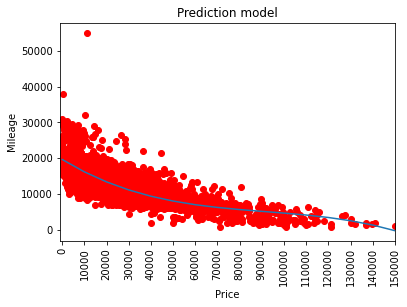

In [42]:
uniq_x = np.array(range(0,160000,10000)).reshape((-1,1))
plt.scatter(x,y,color='red', label='collected values')
plt.plot(uniq_x, poly_reg_model.predict(poly_reg.fit_transform(uniq_x)), label= 'Polynominal regression')
plt.title('Prediction model')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.xticks(rotation=90, ticks=range(0,160000,10000))
pylab.xlim(-1000,150000)
plt.show()

Multivarite linear Regression.

Because there is only high corelation between price and milage or year we will take only 2 arguments as x independent values.

In [43]:
x = df_focus[['year', 'mileage']].values
y = df_focus['pricePD'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/5, random_state=0)
multiple_linear_regressor = LinearRegression()
multiple_linear_regressor.fit(x_train, y_train)
print('Model training score: '+str((multiple_linear_regressor.score(x_train, y_train)*100).round(2))+'%')
print('Model testing score: '+str((multiple_linear_regressor.score(x_test, y_test)*100).round(2))+'%')

Model training score: 62.67%
Model testing score: 62.35%


Multivarite polynominal Regression.

In [44]:
x = df_focus[['year', 'mileage']].values
y = df_focus['pricePD'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/5, random_state=0)

poly_reg = PolynomialFeatures(degree = 3)
x_train = poly_reg.fit_transform(x_train)
x_test = poly_reg.fit_transform(x_test)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)
print('Score of training is: '+ str((poly_reg_model.score(x_train,y_train)*100).round(2))+'%')
print('Score of testing is: '+ str((poly_reg_model.score(x_test,y_test)*100).round(2))+'%')

Score of training is: 69.0%
Score of testing is: 68.48%


Trying to do linear regression with 5 x independent values: 'year', 'engine size', 'mileage', 'transmission', 'fuel type'

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler




In [46]:
x = df_focus.reindex(columns=['year', 'engine size', 'mileage', 'transmission', 'fuel type', 'model', 'pricePD'])
x = x.iloc[:,:5].values
y = df_focus['pricePD'].values

In [47]:
from sklearn.compose import ColumnTransformer
labelencoder_x = LabelEncoder()
#x[:,3] = labelencoder_x.fit_transform(x[:,3])
#x[:,4] = labelencoder_x.fit_transform(x[:,4])
ct = ColumnTransformer([("transmission", OneHotEncoder(), [3]),("fuel type", OneHotEncoder(), [4])], remainder = 'passthrough')
x = ct.fit_transform(x)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/5, random_state=0)



In [49]:
multiple_linear_regressor = LinearRegression()
multiple_linear_regressor.fit(X_train, y_train)
print('Model training score: '+str((multiple_linear_regressor.score(X_train, y_train)*100).round(2))+'%')
print('Model testing score: '+str((multiple_linear_regressor.score(X_test, y_test)*100).round(2))+'%')

Model training score: 83.98%
Model testing score: 85.98%


Trying to do polynominal regression with 5 x independent values: 'year', 'engine size', 'mileage', 'transmission', 'fuel type'

In [50]:
poly_reg = PolynomialFeatures(degree = 2)
X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
print('Score of training is: '+ str((poly_reg_model.score(X_train,y_train)*100).round(2))+'%')
print('Score of testing is: '+ str((poly_reg_model.score(X_test,y_test)*100).round(2))+'%')



Score of training is: 90.2%
Score of testing is: 91.94%
